In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Retail Sales.csv", sep="\t")
df

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,11/5/2022,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,7/9/2022,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,12/12/2022,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,1/6/2022,8:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,11/14/2022,8:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1857,11/9/2022,12:15:00,109,Male,60.0,Electronics,2.0,25.0,7.5,50.0
1996,211,9/12/2022,14:02:00,54,Male,42.0,Beauty,3.0,500.0,235.0,1500.0
1997,650,10/8/2023,12:41:00,98,Male,55.0,Electronics,1.0,30.0,15.0,30.0
1998,1211,11/22/2023,14:59:00,82,Male,42.0,Beauty,3.0,500.0,235.0,1500.0


In [3]:
df.shape

(2000, 11)

In [4]:
df.columns

Index(['transactions_id', 'sale_date', 'sale_time', 'customer_id', 'gender',
       'age', 'category', 'quantiy', 'price_per_unit', 'cogs', 'total_sale'],
      dtype='object')

In [5]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            3
price_per_unit     3
cogs               3
total_sale         3
dtype: int64

In [7]:
df['age'] = df['age'].fillna(df['age'].median())


In [9]:
df.dropna(inplace=True)

Clean dataset shape: (1997, 15)


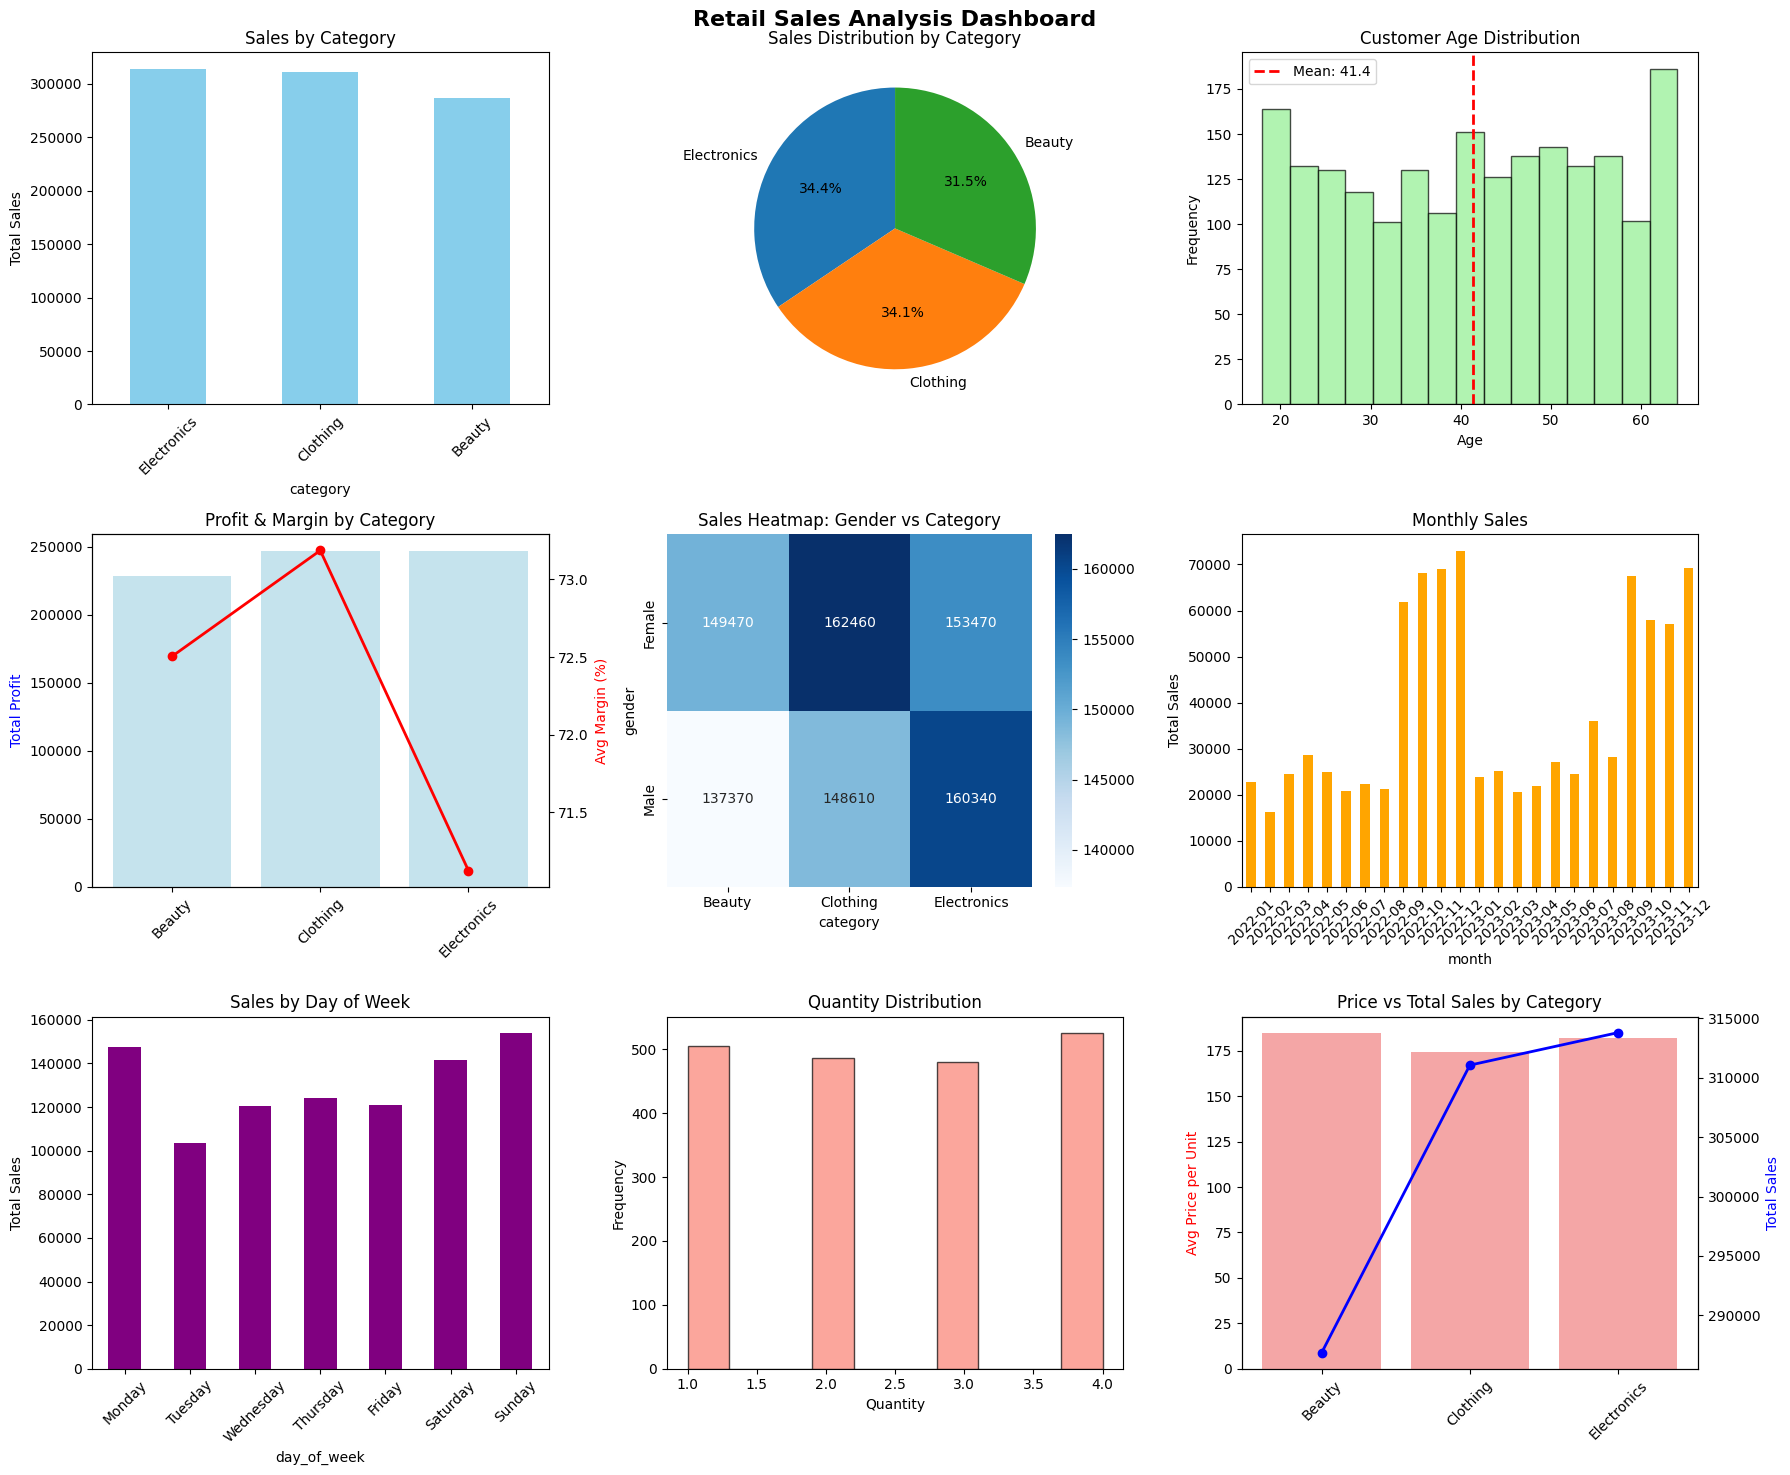


QUICK SUMMARY
Total Revenue: $911,720.00
Total Transactions: 1,997
Unique Customers: 155
Best Category: Electronics
Average Age: 41.4 years


In [ ]:
# Convert date column
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Create calculated fields
df['profit'] = df['total_sale'] - df['cogs']
df['margin_pct'] = (df['profit'] / df['total_sale'] * 100).round(2)
df['month'] = df['sale_date'].dt.strftime('%Y-%m')
df['day_of_week'] = df['sale_date'].dt.day_name()

print(f"Clean dataset shape: {df.shape}")

# Create Charts
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Retail Sales Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Sales by Category - Bar Chart
ax1 = axes[0, 0]
category_sales = df.groupby('category')['total_sale'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Sales by Category')
ax1.set_ylabel('Total Sales')
ax1.tick_params(axis='x', rotation=45)

# 2. Sales Distribution - Pie Chart
ax2 = axes[0, 1]
ax2.pie(category_sales.values, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Sales Distribution by Category')

# 3. Age Distribution - Histogram
ax3 = axes[0, 2]
ax3.hist(df['age'], bins=15, color='lightgreen', edgecolor='black', alpha=0.7)
ax3.axvline(df['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["age"].mean():.1f}')
ax3.set_title('Customer Age Distribution')
ax3.set_xlabel('Age')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Profit vs Margin - Dual Axis Chart
ax4 = axes[1, 0]
profit_by_cat = df.groupby('category').agg({'profit': 'sum', 'margin_pct': 'mean'})
ax4.bar(profit_by_cat.index, profit_by_cat['profit'], color='lightblue', alpha=0.7)
ax4.set_ylabel('Total Profit', color='blue')
ax4.set_title('Profit & Margin by Category')

ax4_twin = ax4.twinx()
ax4_twin.plot(profit_by_cat.index, profit_by_cat['margin_pct'], 'ro-', linewidth=2)
ax4_twin.set_ylabel('Avg Margin (%)', color='red')
ax4.tick_params(axis='x', rotation=45)

# 5. Gender vs Category - Heatmap
ax5 = axes[1, 1]
gender_category = df.groupby(['gender', 'category'])['total_sale'].sum().unstack(fill_value=0)
sns.heatmap(gender_category, annot=True, fmt='.0f', cmap='Blues', ax=ax5)
ax5.set_title('Sales Heatmap: Gender vs Category')

# 6. Monthly Sales - Bar Chart
ax6 = axes[1, 2]
monthly_sales = df.groupby('month')['total_sale'].sum()
monthly_sales.plot(kind='bar', ax=ax6, color='orange')
ax6.set_title('Monthly Sales')
ax6.set_ylabel('Total Sales')
ax6.tick_params(axis='x', rotation=45)

# 7. Day of Week Sales - Bar Chart
ax7 = axes[2, 0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = df.groupby('day_of_week')['total_sale'].sum().reindex(day_order)
day_sales.plot(kind='bar', ax=ax7, color='purple')
ax7.set_title('Sales by Day of Week')
ax7.set_ylabel('Total Sales')
ax7.tick_params(axis='x', rotation=45)

# 8. Quantity Distribution - Histogram
ax8 = axes[2, 1]
ax8.hist(df['quantiy'], bins=10, color='salmon', edgecolor='black', alpha=0.7)
ax8.set_title('Quantity Distribution')
ax8.set_xlabel('Quantity')
ax8.set_ylabel('Frequency')

# 9. Price vs Sales - Dual Axis
ax9 = axes[2, 2]
price_analysis = df.groupby('category').agg({'price_per_unit': 'mean', 'total_sale': 'sum'})
ax9.bar(price_analysis.index, price_analysis['price_per_unit'], color='lightcoral', alpha=0.7)
ax9.set_ylabel('Avg Price per Unit', color='red')
ax9.set_title('Price vs Total Sales by Category')

ax9_twin = ax9.twinx()
ax9_twin.plot(price_analysis.index, price_analysis['total_sale'], 'bo-', linewidth=2)
ax9_twin.set_ylabel('Total Sales', color='blue')
ax9.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Simple Summary
print("\n" + "="*40)
print("QUICK SUMMARY")
print("="*40)
print(f"Total Revenue:{df['total_sale'].sum():,.2f}")
print(f"Total Transactions: {len(df):,}")
print(f"Unique Customers: {df['customer_id'].nunique():,}")
print(f"Best Category: {category_sales.index[0]}")
print(f"Average Age: {df['age'].mean():.1f} years")

# 📊 Key Insights

## 1. User Performance Analysis
- Top performers clearly visible with significant advantage over others
- Performance distribution shows few high achievers and many average users
- Strong correlation between total submissions and points earned

## 2. Daily Pattern Recognition
- Heatmap reveals user consistency patterns across different days
- Some users perform consistently while others show sporadic activity
- Specific dates show overall better/worse platform performance

## 3. Time-based Activity Trends
- Peak hours identified for maximum user engagement opportunities
- Clear morning/evening patterns in user behavior
- Low activity hours present opportunities for targeted campaigns

## 4. Accuracy Assessment
- Success rate serves as overall platform health indicator
- Top incorrect users need coaching and additional support
- Correct vs incorrect ratio reflects individual user skill levels

# 💡 Actionable Insights

- **High performers**: Implement reward and recognition programs
- **Low activity hours**: Optimize push notification strategies
- **Struggling users**: Provide additional support and tutorials
- **Peak hours**: Plan server capacity and schedule live events

# 🎯 Business Value

- User engagement optimization
- Personalized learning path development
- Improved resource allocation
- Enhanced community building strategies

